In [190]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

In [26]:
diabetes_df = pd.read_csv('diabetes_clean.csv')

# EDA - Eksploracyjna analiza danych

In [109]:
columns = list(diabetes_df.columns)
columns

['pregnancies',
 'glucose',
 'diastolic',
 'triceps',
 'insulin',
 'bmi',
 'dpf',
 'age',
 'diabetes']

In [146]:
def remove_outliers_iqr(df, column):
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_clean = df[(df[column] >= lower) & (df[column] <= upper)]
    
    return df_clean

In [27]:
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


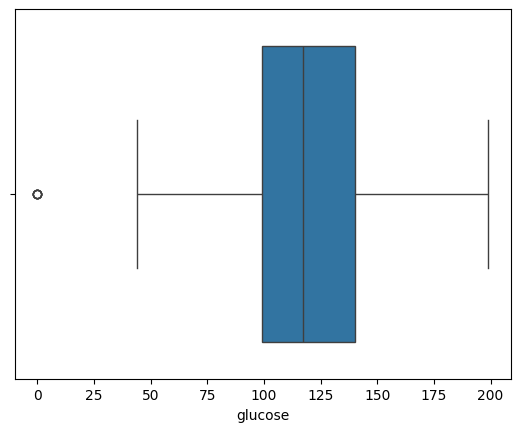

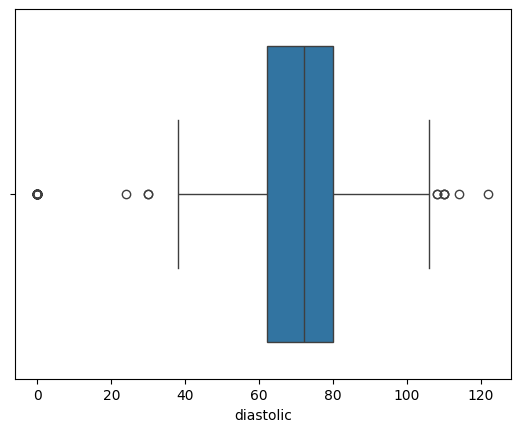

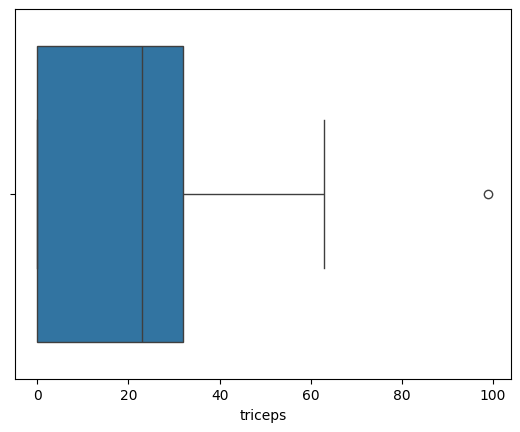

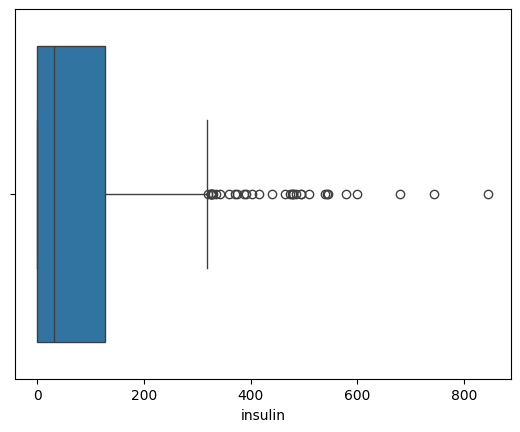

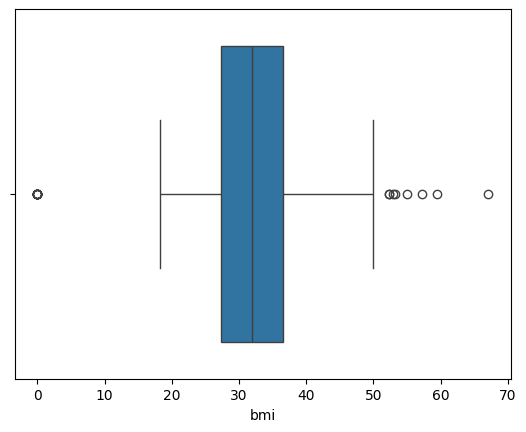

In [167]:
cols_to_vis = ["glucose", "diastolic", "triceps", "insulin", "bmi"]
for col in cols_to_vis:
    sns.boxplot(diabetes_df, x=col)
    plt.show()


In [128]:
cols_to_vis = ["glucose", "diastolic", "triceps", "insulin", "bmi"]
df_clean = diabetes_df.copy()

for column in cols_to_vis:
    df_clean = remove_outliers_iqr(df_clean, column)


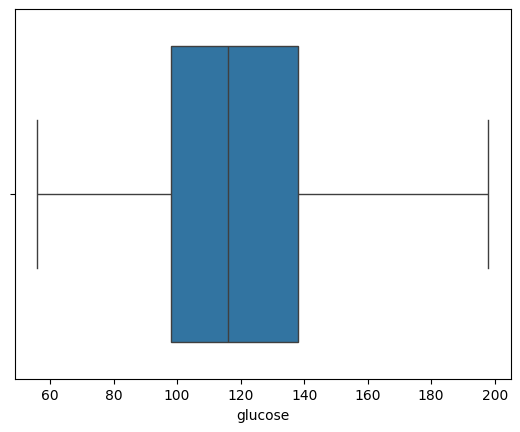

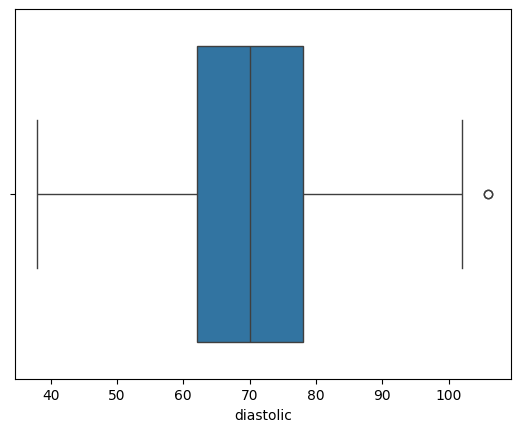

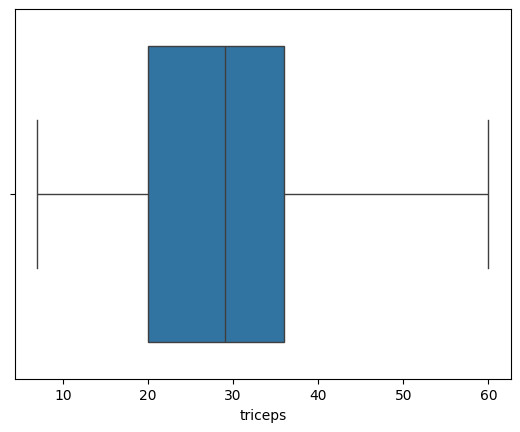

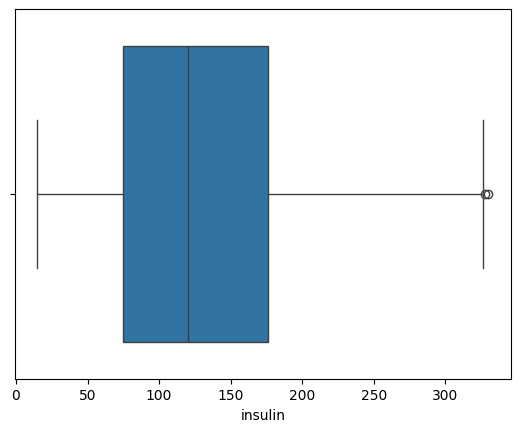

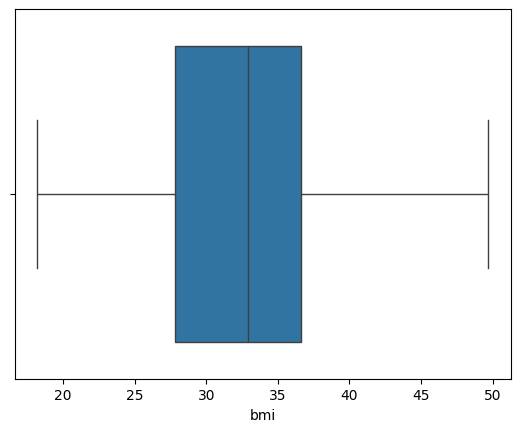

In [168]:
cols_to_vis = ["glucose", "diastolic", "triceps", "insulin", "bmi"]
for col in cols_to_vis:
    sns.boxplot(df_clean, x=col)
    plt.show()

In [172]:
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values

X_bmi = X[:, 4]
print(X_bmi)

[33.6 26.6 23.3 28.1 43.1 25.6 31.  35.3 30.5  0.  37.6 38.  27.1 30.1
 25.8 30.  45.8 29.6 43.3 34.6 39.3 35.4 39.8 29.  36.6 31.1 39.4 23.2
 22.2 34.1 36.  31.6 24.8 19.9 27.6 24.  33.2 32.9 38.2 37.1 34.  40.2
 22.7 45.4 27.4 42.  29.7 28.  39.1  0.  19.4 24.2 24.4 33.7 34.7 23.
 37.7 46.8 40.5 41.5  0.  32.9 25.  25.4 32.8 29.  32.5 42.7 19.6 28.9
 32.9 28.6 43.4 35.1 32.  24.7 32.6 37.7 43.2 25.  22.4  0.  29.3 24.6
 48.8 32.4 36.6 38.5 37.1 26.5 19.1 32.  46.7 23.8 24.7 33.9 31.6 20.4
 28.7 49.7 39.  26.1 22.5 26.6 39.6 28.7 22.4 29.5 34.3 37.4 33.3 34.
 31.2 34.  30.5 31.2 34.  33.7 28.2 23.2 53.2 34.2 33.6 26.8 33.3 55.
 42.9 33.3 34.5 27.9 29.7 33.3 34.5 38.3 21.1 33.8 30.8 28.7 31.2 36.9
 21.1 39.5 32.5 32.4 32.8  0.  32.8 30.5 33.7 27.3 37.4 21.9 34.3 40.6
 47.9 50.  24.6 25.2 29.  40.9 29.7 37.2 44.2 29.7 31.6 29.9 32.5 29.6
 31.9 28.4 30.8 35.4 28.9 43.5 29.7 32.7 31.2 67.1 45.  39.1 23.2 34.9
 27.7 26.8 27.6 35.9 30.1 32.  27.9 31.6 22.6 33.1 30.4 52.3 24.4 39.4
 24.3 22.

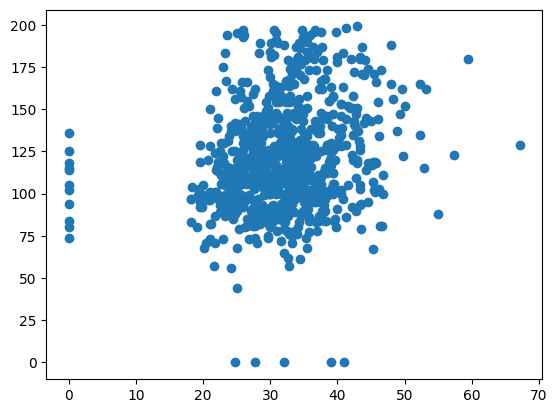

In [170]:
plt.scatter(X_bmi, y)

Text(0.5, 0, 'Body mass index')

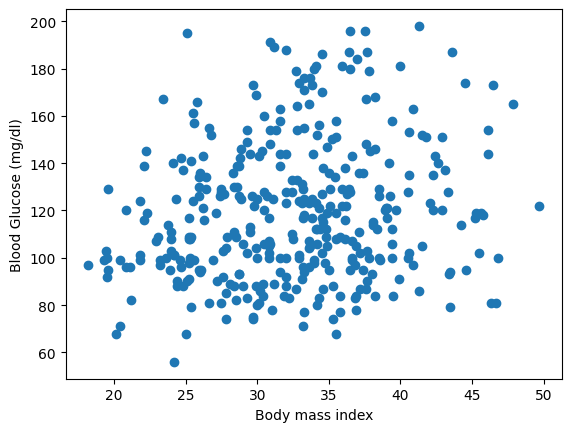

In [175]:
cols_to_check = ["glucose", "diastolic", "triceps", "insulin", "bmi", "age"]
df_clean = df_clean[(df_clean[cols_to_check] > 0).all(axis=1)]

X_clean = df_clean.drop("glucose", axis=1).values
y_clean = df_clean["glucose"].values
X_bmi_clean = X_clean[:, 4]

plt.scatter(X_bmi_clean, y_clean)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel('Body mass index')

<Axes: >

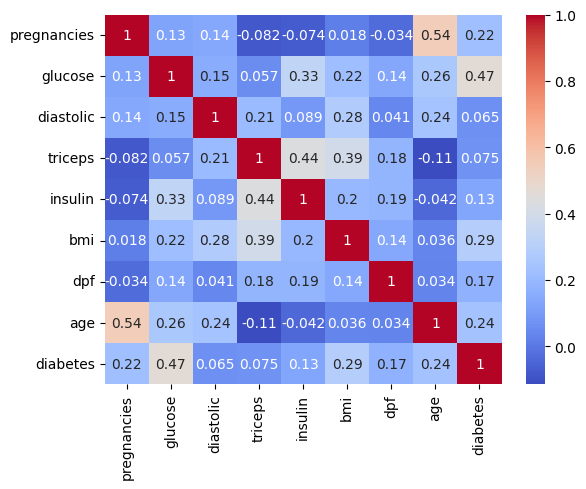

In [148]:
co_mtx = diabetes_df.corr(numeric_only=True)
sns.heatmap(co_mtx, cmap="coolwarm", annot=True)

<Axes: >

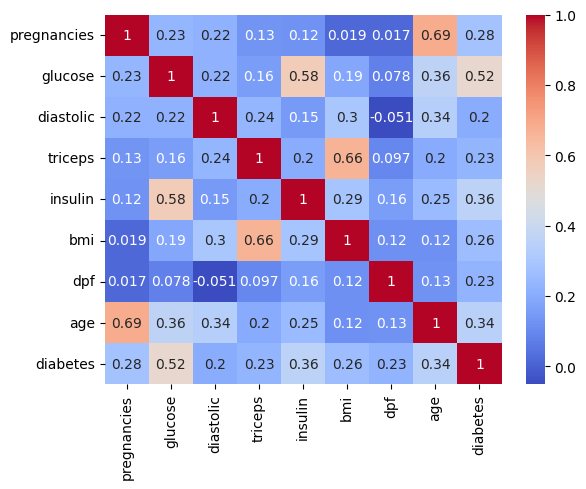

In [149]:
co_mtx_clean = df_clean.corr(numeric_only=True)
sns.heatmap(co_mtx_clean, cmap="coolwarm", annot=True)

In [178]:
X_bmi_clean = X_bmi_clean.reshape(-1, 1)
print(X_bmi_clean.shape, y_clean.shape)

(357, 1) (357,)


Text(0.5, 0, 'Body mass index')

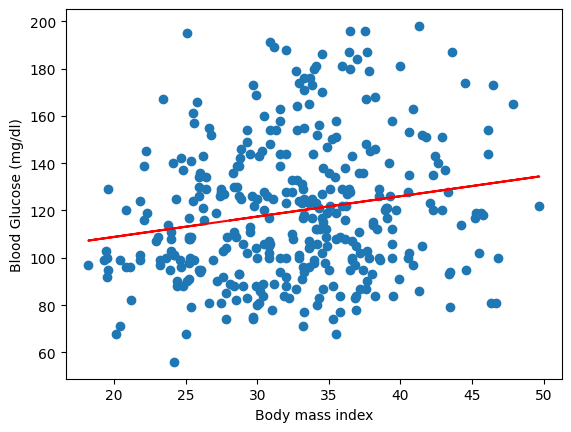

In [181]:
reg = LinearRegression()
reg.fit(X_bmi_clean, y_clean)
predictions = reg.predict(X_bmi_clean)
plt.scatter(X_bmi_clean, y_clean,)
plt.plot(X_bmi_clean, predictions, color = "red")
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel('Body mass index')


In [189]:
X_train, X_test, y_train, y_test = train_test_split(X_bmi_clean, y_clean, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

reg_all.score(X_test, y_test)

0.038631456154343824

In [191]:
root_mean_squared_error(y_test, y_pred)

29.4861684981374